In [ ]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
#sns.set(rc={'figure.figsize':(20,10)})

In [ ]:
df = pd.read_excel("Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1_CLEANED.xlsx")

In [ ]:
df = df.drop('Unnamed: 0', axis =1)

Rename Columns

In [ ]:
df.rename(columns={'Timestamp':'time',
                     'How old are you?': 'age',
                     'What industry do you work in?':'industry',
                     'Job title': 'job',
                     'If your job title needs additional context, please clarify here:':'job_others',
                     "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'annual_salary' , 'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.' : 'addtl_compensation',
                     'Please indicate the currency': "currency",
                     'If "Other," please indicate the currency here: ': "currency_others",
                     'If your income needs additional context, please provide it here:': "income_addlcontext",
                     'What country do you work in?': "work_country",
                     "If you're in the U.S., what state do you work in?" : "US_state",
                     'What city do you work in?': "city",
                     'How many years of professional work experience do you have overall?': "yrs_exp",
                     'How many years of professional work experience do you have in your field?' : 'yrs_exp_field',
                     'What is your highest level of education completed?': "educ_level",
                     'What is your gender?': "gender",
                     'What is your race? (Choose all that apply.)' : "race"},
            inplace=True)

Change to correct data type

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['annual_salary'] = df['annual_salary'].str.replace(',', '')
df['annual_salary'] = df['annual_salary'].astype('float')
df['age'] = df['age'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28042 entries, 0 to 28041
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                28042 non-null  datetime64[ns]
 1   age                 28042 non-null  int64         
 2   industry            27968 non-null  object        
 3   job                 28041 non-null  object        
 4   job_others          7259 non-null   object        
 5   annual_salary       28042 non-null  float64       
 6   addtl_compensation  20755 non-null  float64       
 7   currency            28042 non-null  object        
 8   currency_others     202 non-null    object        
 9   income_addlcontext  3040 non-null   object        
 10  work_country        28042 non-null  object        
 11  US_state            23028 non-null  object        
 12  city                27960 non-null  object        
 13  yrs_exp             28042 non-null  int64     

Inspect null values

In [ ]:
df.isnull().sum().sort_values(ascending=False) # check number of missing values

currency_others       27840
income_addlcontext    25002
job_others            20783
addtl_compensation     7287
US_state               5014
educ_level              219
race                    175
gender                  170
city                     82
industry                 74
job                       1
currency                  0
annual_salary             0
age                       0
work_country              0
yrs_exp                   0
yrs_exp_field             0
time                      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28042 entries, 0 to 28041
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                28042 non-null  datetime64[ns]
 1   age                 28042 non-null  int64         
 2   industry            27968 non-null  object        
 3   job                 28041 non-null  object        
 4   job_others          7259 non-null   object        
 5   annual_salary       28042 non-null  float64       
 6   addtl_compensation  20755 non-null  float64       
 7   currency            28042 non-null  object        
 8   currency_others     202 non-null    object        
 9   income_addlcontext  3040 non-null   object        
 10  work_country        28042 non-null  object        
 11  US_state            23028 non-null  object        
 12  city                27960 non-null  object        
 13  yrs_exp             28042 non-null  int64     

Drop duplicates

In [ ]:
#drop duplicates
df=df.drop_duplicates(subset=['age', 'industry', 'job', 'job_others', 'annual_salary',
       'addtl_compensation', 'currency', 'currency_others',
       'income_addlcontext', 'work_country', 'US_state', 'city', 'yrs_exp',
       'yrs_exp_field', 'educ_level', 'gender', 'race'])

Drop irrelevant columns, null values

In [ ]:
df.drop(columns=['time', 'currency_others', 'income_addlcontext', 'job_others'], inplace=True)

<ipython-input-10-4f7671e259c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['time', 'currency_others', 'income_addlcontext', 'job_others'], inplace=True)


In [ ]:
df1 = df.copy()

df1 = df1[~df1['educ_level'].isna()]
df1 = df1[~df1['race'].isna()]
df1 = df1[~df1['gender'].isna()]
df1 = df1[~df1['city'].isna()]
df1 = df1[~df1['industry'].isna()]
df1 = df1[~df1['job'].isna()]

In [ ]:
df1

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
1,31,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,United Kingdom,NaN,Cambridge,10,5,College degree,Non-binary,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,NaN,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,46,Health care,Research Manager,77600.0,0.0,USD,United States,Utah,Salt Lake City,14,7,Master's degree,Woman,White
28038,41,Hospitality & Events,Director of Training,85000.0,NaN,USD,United States,Texas,Dallas,25,11,Some college,Woman,White
28039,29,Computing or Tech,Digital Content Developer,80000.0,6000.0,USD,USA,Minnesota,Minneapolis,8,7,College degree,Woman,Asian or Asian American
28040,29,Business or Consulting,business analyst,59000.0,0.0,USD,United States,Alabama,birmingham,14,1,College degree,Man,White


Fill numerical columns

In [ ]:
df1['addtl_compensation'].fillna(0, inplace=True)

Deal with outliers

In [ ]:
df1.describe()

,age,annual_salary,addtl_compensation,yrs_exp,yrs_exp_field
count,27434.000000,2.743400e+04,2.743400e+04,27434.000000,27434.000000
mean,36.156558,1.436183e+05,1.354424e+04,13.029234,9.531567
std,9.291005,5.420937e+06,7.256554e+05,8.522015,7.457387
min,14.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,29.000000,5.400000e+04,0.000000e+00,7.000000,4.000000
50%,35.000000,7.500000e+04,0.000000e+00,11.000000,7.000000
75%,42.000000,1.092615e+05,5.000000e+03,18.000000,13.000000
max,85.000000,8.700000e+08,1.200000e+08,50.000000,50.000000


In [ ]:
def remove_outlier_data(df1, column):

  Q1c=df1[column].quantile(0.25)
  Q3c=df1[column].quantile(0.75)

  print('1stQ: ',Q1c, ' 2nsQ: ',Q3c)

  IQRc = Q3c-Q1c
  l = Q1c-1.5*IQRc
  h = Q3c+1.5*IQRc

  print(df1.shape, l, h)
  data1 = df1[(df1[column] >l)&(df1[column] < h)]

  return data1

In [ ]:
df2 = remove_outlier_data(df1, 'annual_salary')
df2 = remove_outlier_data(df2, 'addtl_compensation')
df2 = remove_outlier_data(df2, 'yrs_exp')
df2 = remove_outlier_data(df2, 'yrs_exp_field')
df2 = remove_outlier_data(df2, 'age')

1stQ:  54000.0  2nsQ:  109261.5
(27434, 14) -28892.25 192153.75
1stQ:  0.0  2nsQ:  5000.0
(26270, 14) -7500.0 12500.0
1stQ:  6.0  2nsQ:  18.0
(22964, 14) -12.0 36.0
1stQ:  4.0  2nsQ:  12.0
(22525, 14) -8.0 24.0
1stQ:  29.0  2nsQ:  40.0
(21556, 14) 12.5 56.5


In [ ]:
df2

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
1,31,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,United Kingdom,NaN,Cambridge,10,5,College degree,Non-binary,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,46,Health care,Research Manager,77600.0,0.0,USD,United States,Utah,Salt Lake City,14,7,Master's degree,Woman,White
28038,41,Hospitality & Events,Director of Training,85000.0,0.0,USD,United States,Texas,Dallas,25,11,Some college,Woman,White
28039,29,Computing or Tech,Digital Content Developer,80000.0,6000.0,USD,USA,Minnesota,Minneapolis,8,7,College degree,Woman,Asian or Asian American
28040,29,Business or Consulting,business analyst,59000.0,0.0,USD,United States,Alabama,birmingham,14,1,College degree,Man,White


Check number of unique entries per column

In [ ]:
for cat in df2.columns:

  print(cat, df2[cat].nunique())

age 42
industry 1007
job 11447
annual_salary 2905
addtl_compensation 398
currency 9
work_country 312
US_state 112
city 4073
yrs_exp 36
yrs_exp_field 24
educ_level 6
gender 5
race 46


Find inconsistent USA names

In [ ]:
df3 = df2.copy()
df3

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
1,31,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,United Kingdom,NaN,Cambridge,10,5,College degree,Non-binary,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,46,Health care,Research Manager,77600.0,0.0,USD,United States,Utah,Salt Lake City,14,7,Master's degree,Woman,White
28038,41,Hospitality & Events,Director of Training,85000.0,0.0,USD,United States,Texas,Dallas,25,11,Some college,Woman,White
28039,29,Computing or Tech,Digital Content Developer,80000.0,6000.0,USD,USA,Minnesota,Minneapolis,8,7,College degree,Woman,Asian or Asian American
28040,29,Business or Consulting,business analyst,59000.0,0.0,USD,United States,Alabama,birmingham,14,1,College degree,Man,White


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21285 entries, 0 to 28041
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 21285 non-null  int64  
 1   industry            21285 non-null  object 
 2   job                 21285 non-null  object 
 3   annual_salary       21285 non-null  float64
 4   addtl_compensation  21285 non-null  float64
 5   currency            21285 non-null  object 
 6   work_country        21285 non-null  object 
 7   US_state            17343 non-null  object 
 8   city                21285 non-null  object 
 9   yrs_exp             21285 non-null  int64  
 10  yrs_exp_field       21285 non-null  int64  
 11  educ_level          21285 non-null  object 
 12  gender              21285 non-null  object 
 13  race                21285 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 2.4+ MB


Select only top 80% of occurences on the race, industry, and work country column

In [ ]:
df_us = df3[df3['currency'] == 'USD']
df_us.head()

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White
5,28,Education (Higher Education),Scholarly Publishing Librarian,62000.0,0.0,USD,USA,New Hampshire,Hanover,8,2,Master's degree,Man,White


In [ ]:
for cat in df_us.columns:

  print(cat, df_us[cat].nunique())

age 42
industry 862
job 9583
annual_salary 2404
addtl_compensation 350
currency 1
work_country 186
US_state 112
city 3309
yrs_exp 36
yrs_exp_field 24
educ_level 6
gender 5
race 42


In [ ]:
df4 = df_us.copy()
df4.head()

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White
5,28,Education (Higher Education),Scholarly Publishing Librarian,62000.0,0.0,USD,USA,New Hampshire,Hanover,8,2,Master's degree,Man,White


In [ ]:
int(len(df4)*0.8)

14057

Geto top 80 for race, industry

In [ ]:
#top_80_race = df4["race"].value_counts().head(5)
#s = df4["industry"].value_counts().cumsum() < int(len(df4) * 0.8)
#top_80_industry = s[s].index
#s1 = df4["US_state"].value_counts().cumsum()<int(len(df4) * 0.8)
#top_80_state = s1[s1].index
#s2 = df4["job"].value_counts().cumsum()<int(len(df4) * 0.8)
#top_80_job = s2[s2].index

In [ ]:
#ind = df4['industry'].value_counts().cumsum() <int(len(df4) * 0.8)
#top_80_ind = ind[ind].index

#top_80_race = df4['race'].value_counts().head(5).index

#state = df4['US_state'].value_counts().cumsum() <int(len(df4) * 0.8)
#top_80_state = state[state].index

#df5 = df4[df4['industry'].isin(top_80_ind) & df4['race'].isin(top_80_race) & df4['US_state'].isin(top_80_state)]
#df5

In [ ]:
#int(len(df4['industry'].unique()) * 0.8)

Input these values into df3 to reduce number of dummies

# **K-means clustering**

working df: df3

In [ ]:
df3.head()

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
1,31,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,United Kingdom,NaN,Cambridge,10,5,College degree,Non-binary,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White


**Scale data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.vq import kmeans, vq

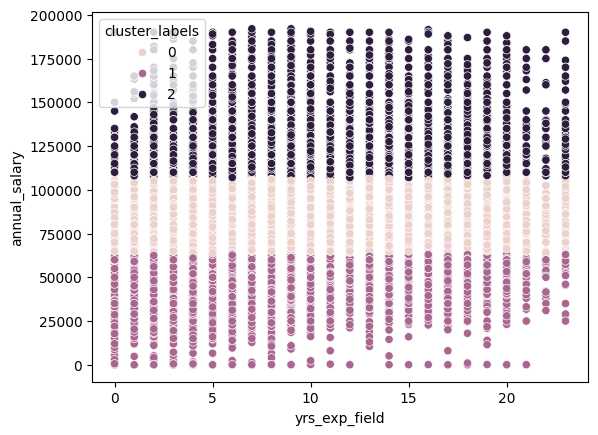

In [ ]:
#generate cluster centers and labels
cluster_centers, _ = kmeans(df3[['yrs_exp_field', 'annual_salary']], 3)
df3['cluster_labels'], _ = vq(df3[['yrs_exp_field', 'annual_salary']], cluster_centers)

#plot clusters
sns.scatterplot(x='yrs_exp_field', y='annual_salary', hue='cluster_labels', data=df3)
plt.show()

Determine optimal number of clusters

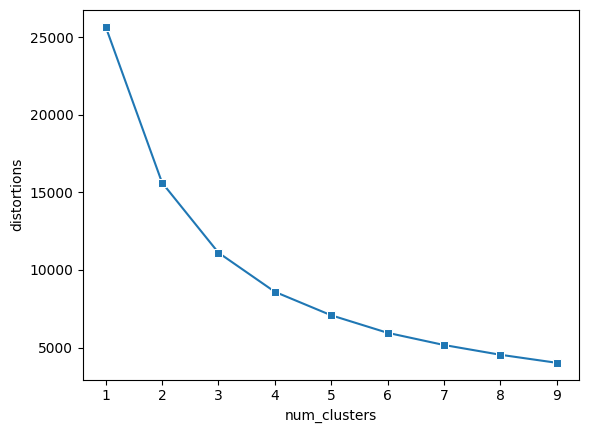

In [ ]:
distortions = []

num_clusters = range(1, 10) #from 2 to 6

#2populating distortions for various clusters
# collect distortions from eachrun of kmeans

for i in num_clusters:
	centroids, distortion = kmeans(df3[['yrs_exp_field', 'annual_salary']], i)
	distortions.append(distortion)

#3 plot elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters' : num_clusters,
															'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', marker='s', markersize=6,
							data= elbow_plot_data)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


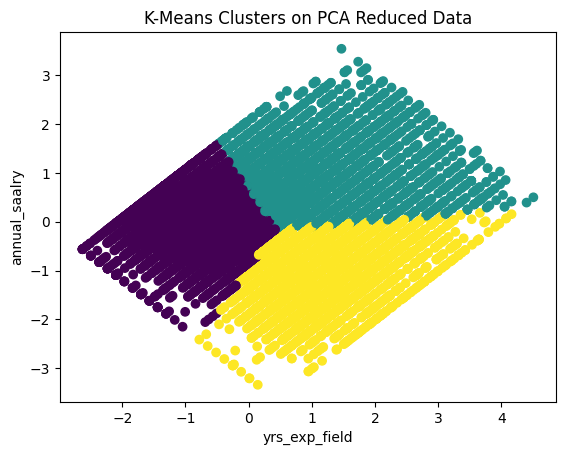

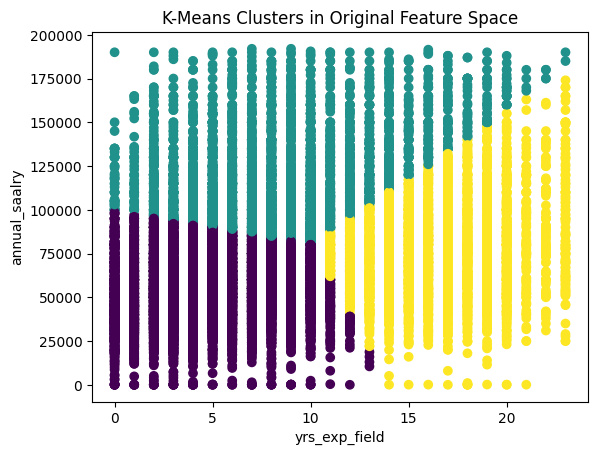

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler  # Consider using StandardScaler for k-means
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your data as a pandas DataFrame
data = pd.DataFrame({
    # Replace with your actual feature names and data
    'feature1': df3['yrs_exp_field'],
    'feature2': df3['annual_salary'],
})

# Standardize data (optional but recommended for k-means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction (choose number of components)
n_components = 2  # Experiment with different numbers of components
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(scaled_data)

# Perform k-means clustering (choose number of clusters based on data)
n_clusters = 3  # Experiment with different cluster numbers
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_data)

# Visualize the clusters in the reduced-dimensional space
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels)
plt.title('K-Means Clusters on PCA Reduced Data')
plt.xlabel('yrs_exp_field')
plt.ylabel('annual_saalry')
plt.show()

# Optionally, visualize the clusters in the original high-dimensional space
# This may not be very informative in high dimensions, but it can be helpful
# for understanding how the clusters are formed in the original space.
plt.scatter(data['feature1'], data['feature2'], c=cluster_labels)
plt.title('K-Means Clusters in Original Feature Space')
plt.xlabel('yrs_exp_field')
plt.ylabel('annual_saalry')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


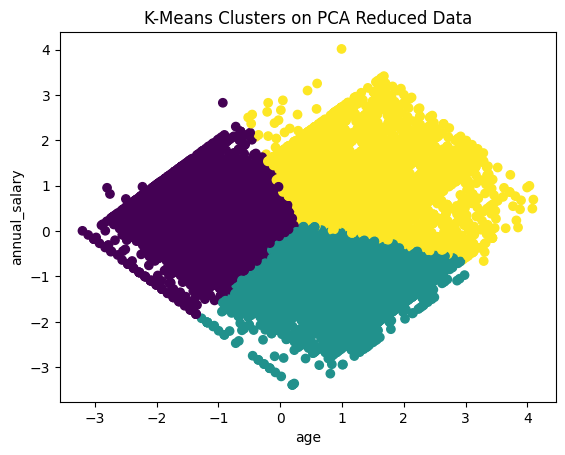

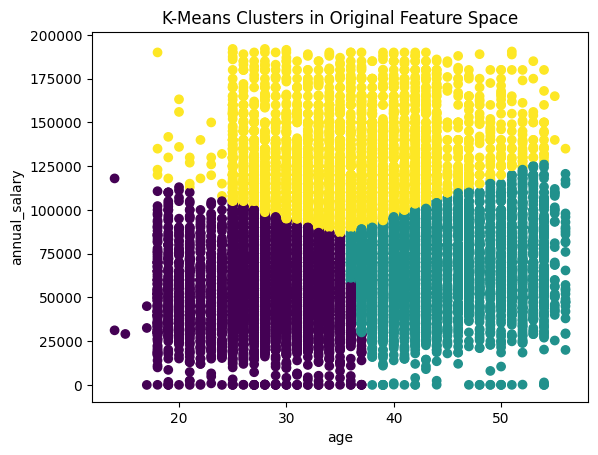

In [ ]:
# Load your data as a pandas DataFrame
data = pd.DataFrame({
    # Replace with your actual feature names and data
    'feature1': df3['age'],
    'feature2': df3['annual_salary'],
})

# Standardize data (optional but recommended for k-means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction (choose number of components)
n_components = 2  # Experiment with different numbers of components
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(scaled_data)

# Perform k-means clustering (choose number of clusters based on data)
n_clusters = 3  # Experiment with different cluster numbers
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_data)

# Visualize the clusters in the reduced-dimensional space
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels)
plt.title('K-Means Clusters on PCA Reduced Data')
plt.xlabel('age')
plt.ylabel('annual_salary')
plt.show()

# Optionally, visualize the clusters in the original high-dimensional space
# This may not be very informative in high dimensions, but it can be helpful
# for understanding how the clusters are formed in the original space.
plt.scatter(data['feature1'], data['feature2'], c=cluster_labels)
plt.title('K-Means Clusters in Original Feature Space')
plt.xlabel('age')
plt.ylabel('annual_salary')
plt.show()